In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy as stats


# use seaborn plotting defaults
import seaborn as sns;sns.set()

***Working With Prefectly Linear Datasets***

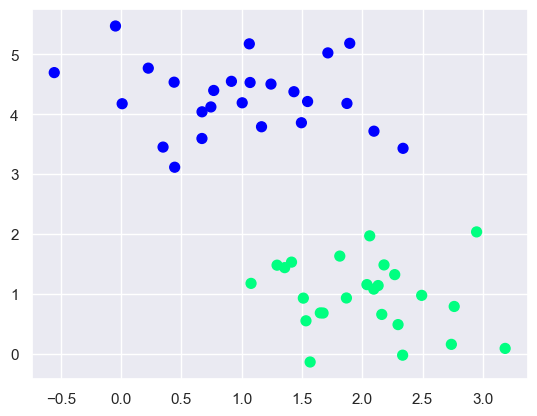

In [12]:
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples = 50,centers = 2,random_state = 0, cluster_std = 0.60)

plt.scatter(X[:,0],X[:,1], c= y,s = 50, cmap = 'winter')


In [13]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel = 'linear', C =1)
model.fit(X,y)

SVC(C=1, kernel='linear')

In [14]:

def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

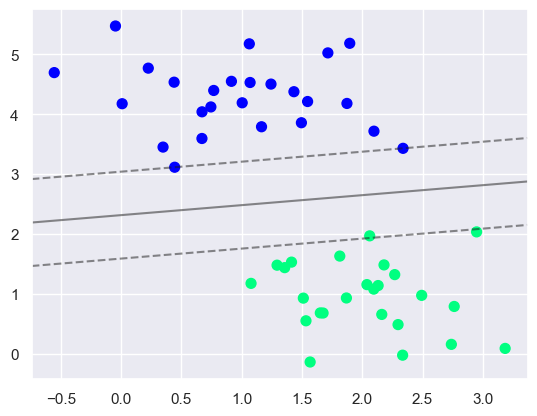

In [15]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
plot_svc_decision_function(model);

**The importance of Support Vectors**

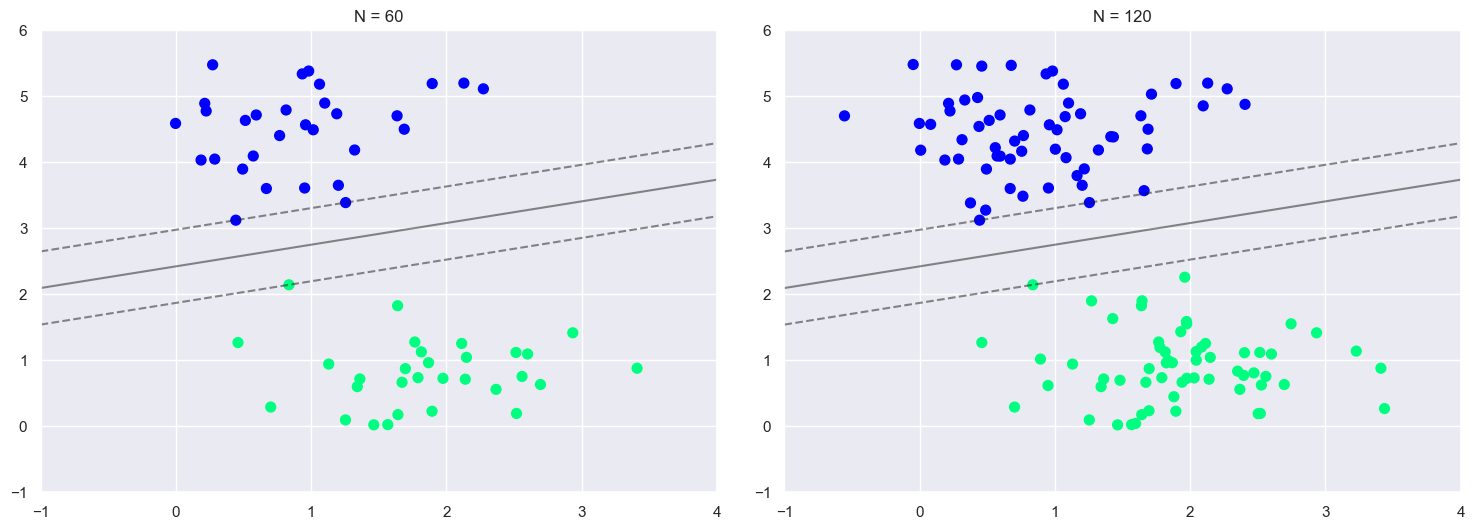

In [16]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

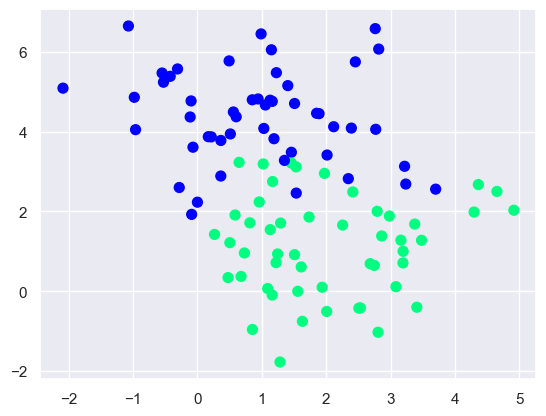

In [17]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter');

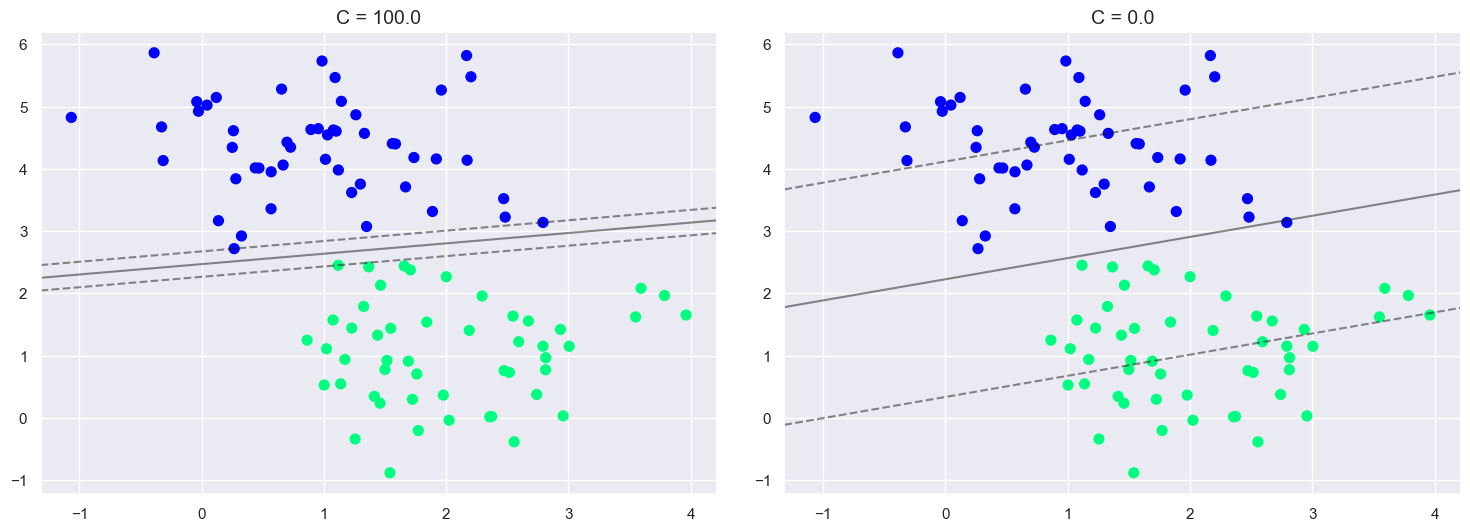

In [18]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [100.0, 0.01]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

**Kernel Trick SVM**

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

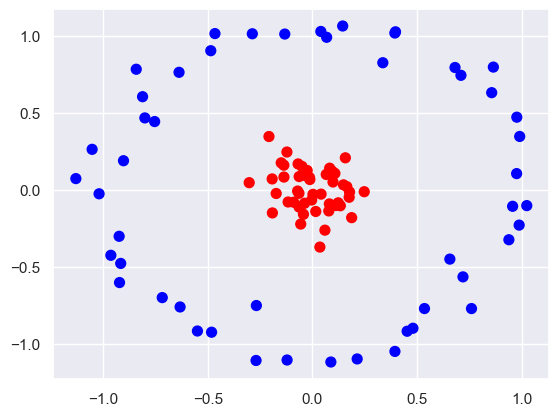

In [21]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='bwr')

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [23]:
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train.ravel())
y_pred = classifier.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.5

In [26]:
zero_one_colourmap = ListedColormap(('blue', 'red'))
def plot_decision_boundary(X, y, clf):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                                 stop = X_set[:, 0].max() + 1, 
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1, 
                                 stop = X_set[:, 1].max() + 1, 
                                 step = 0.01))
  
    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), 
                                             X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75, 
               cmap = zero_one_colourmap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = (zero_one_colourmap)(i), label = j)
    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()

C:\Users\Aditya kumar Dubey\AppData\Local\Temp\ipykernel_1804\3603277588.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


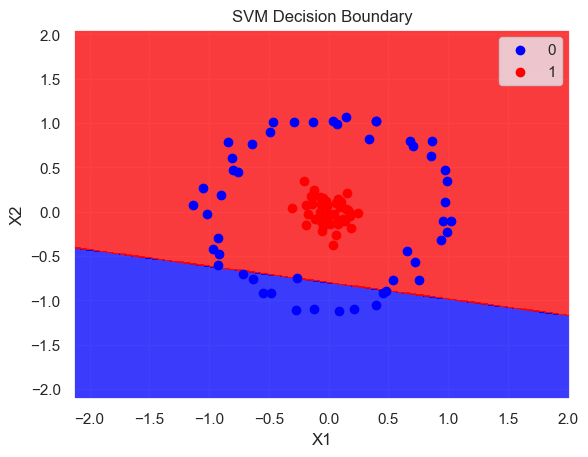

In [27]:
plot_decision_boundary(X, y, classifier)

In [28]:
def plot_3d_plot(X, y):
    r = np.exp(-(X ** 2).sum(1))
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=100, cmap='bwr')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    return ax

<Axes3D: xlabel='X1', ylabel='X2', zlabel='y'>

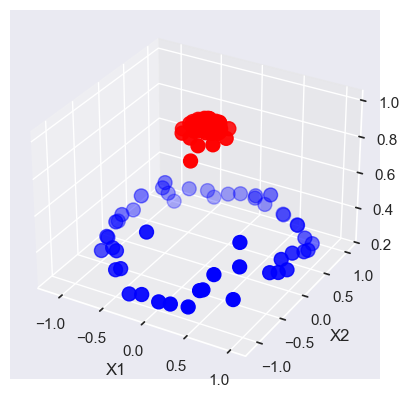

In [29]:
plot_3d_plot(X,y)

In [30]:
rbf_classifier = SVC(kernel="rbf")
rbf_classifier.fit(X_train, y_train)
y_pred = rbf_classifier.predict(X_test)

In [31]:
accuracy_score(y_test, y_pred)

1.0

C:\Users\Aditya kumar Dubey\AppData\Local\Temp\ipykernel_1804\3603277588.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


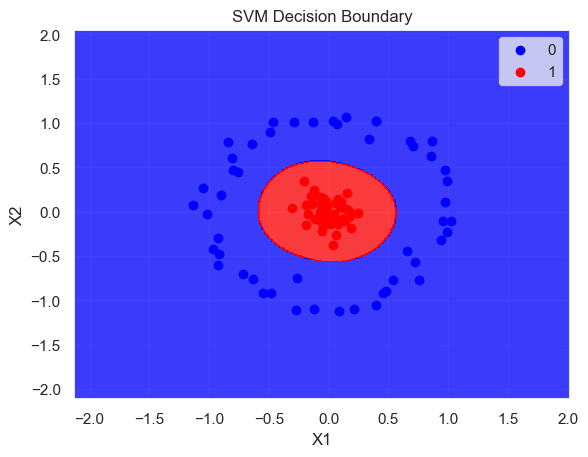

In [32]:
plot_decision_boundary(X, y, rbf_classifier)

In [33]:
poly_classifier = SVC(kernel="poly",degree=2)
poly_classifier.fit(X_train, y_train)
y_pred = poly_classifier.predict(X_test)

In [34]:
accuracy_score(y_test, y_pred)

1.0

C:\Users\Aditya kumar Dubey\AppData\Local\Temp\ipykernel_1804\3603277588.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


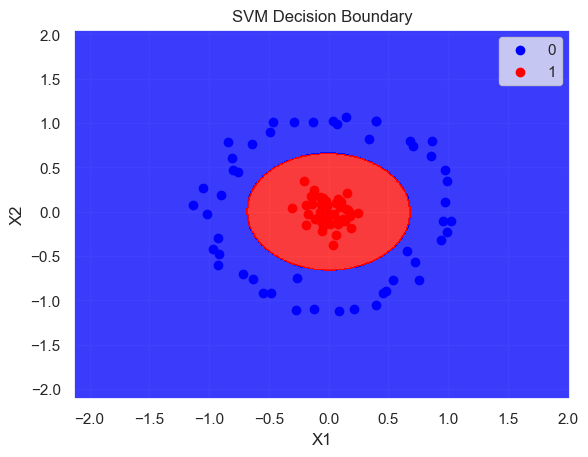

In [35]:
plot_decision_boundary(X, y, poly_classifier)

In [36]:
X

array([[-0.06479842, -0.02130033],
       [-1.02033358, -0.02471567],
       [ 0.01573171, -0.13939152],
       [-1.05362608,  0.26375738],
       [ 0.00234136, -0.02821055],
       [-0.1214128 , -1.10289572],
       [ 0.16415642,  0.02151796],
       [-0.13645049,  0.08380411],
       [-0.00388424, -0.06513263],
       [-0.84267162,  0.7832593 ],
       [-0.03097974,  0.10941509],
       [-0.63299565, -0.75884354],
       [-0.20803228,  0.3468588 ],
       [ 0.45266949, -0.91626286],
       [ 0.12311376, -0.08332806],
       [ 0.09475481,  0.12099695],
       [ 0.99089648,  0.34730314],
       [ 0.17545136, -0.04716925],
       [ 0.14447765,  1.0637205 ],
       [ 0.05950362, -0.2606112 ],
       [ 0.39707203,  1.02609259],
       [ 0.3363782 ,  0.82550543],
       [-0.96402782, -0.42365231],
       [ 0.65693993, -0.44840161],
       [-0.71828257, -0.69811524],
       [-0.80142943,  0.46751496],
       [-0.13243004,  1.01144935],
       [-0.01261365,  0.06793267],
       [ 0.76041108,

In [37]:
np.exp(-(X**2)).sum(1)

array([1.99535637, 1.35246226, 1.98051009, 1.26231355, 1.999199  ,
       1.28166819, 1.97294959, 1.974555  , 1.99575164, 1.03305237,
       1.98714043, 1.23209246, 1.8442903 , 1.24663109, 1.97803778,
       1.9765281 , 1.26097893, 1.96746333, 1.30189121, 1.93080248,
       1.2030711 , 1.39889471, 1.230514  , 1.46734863, 1.21118813,
       1.32975379, 1.34211924, 1.99523669, 1.11425067, 1.16182232,
       1.97713323, 1.98047614, 1.21099312, 1.98569575, 1.32361447,
       1.91027787, 1.21016031, 1.97843184, 1.27262817, 1.25614734,
       1.22402018, 1.99492907, 1.50076729, 1.98419969, 1.4066483 ,
       1.98537162, 1.97359372, 1.19000519, 1.95589904, 1.87055003,
       1.3890126 , 1.17199587, 1.97349451, 1.219249  , 1.98554361,
       1.97704531, 1.96983389, 1.16040125, 1.98350234, 1.9474047 ,
       1.30414512, 1.38702225, 1.97563029, 1.98382705, 1.94204748,
       1.9404253 , 1.98772995, 1.96888013, 1.22408842, 1.93294769,
       1.34569601, 1.97756658, 1.93377731, 1.00290737, 1.23152

In [38]:
X_new=np.exp(-(X**2))

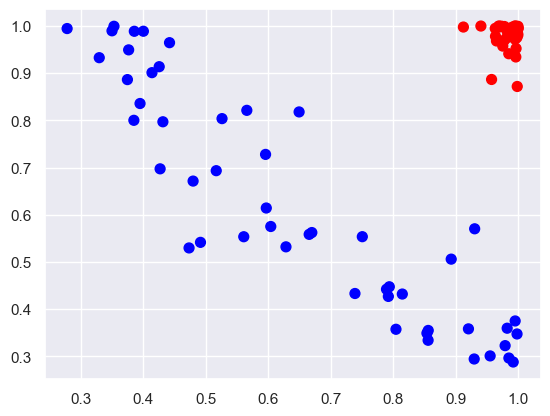

In [39]:
plt.scatter(X_new[:, 0], X_new[:, 1], c=y, s=50, cmap='bwr')